In [39]:
import mss
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import pyautogui
import time

In [40]:
# Variables

mon = 2 # set the screen capture on second monitor
templates = "./image_templates"
SCT = mss.mss()

mon1_offset = [3439, 118] #this is the monitor offset resolution

In [41]:
[ print(f"Monitor {x}\n" + str(SCT.monitors[x])) for x in [0, 1, 2] ]

Monitor 0
{'left': -3440, 'top': -118, 'width': 5360, 'height': 1440}
Monitor 1
{'left': 0, 'top': 0, 'width': 1920, 'height': 1080}
Monitor 2
{'left': -3440, 'top': -118, 'width': 3440, 'height': 1440}


[None, None, None]

In [42]:
# Functions

def main_screen(height=1720):
    scr = SCT.grab({
                'left': SCT.monitors[2]['left'],
                'top': SCT.monitors[2]['top'],
                'width': 1720,
                'height': SCT.monitors[2]['height']
            })
    img = np.array(scr)
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def click_button(template: np.array, result: tuple, confidence: float = 0.8):
    w, h = template.shape
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    if  max_val > 0.8:
        x_click = (max_loc[0] + w/2) - mon1_offset[0]
        y_click = (max_loc[1] + h/2) - mon1_offset[1]
        pyautogui.moveTo(x_click, y_click)
        pyautogui.click()
    else:
        print(f"Confidence not high enough: {max_val} < {confidence}")

def sleep(sec: int = 2):
    time.sleep(sec)


In [43]:
screen = main_screen()
#plt.imshow(screen, cmap='gray')
screen.shape


(1440, 1720)

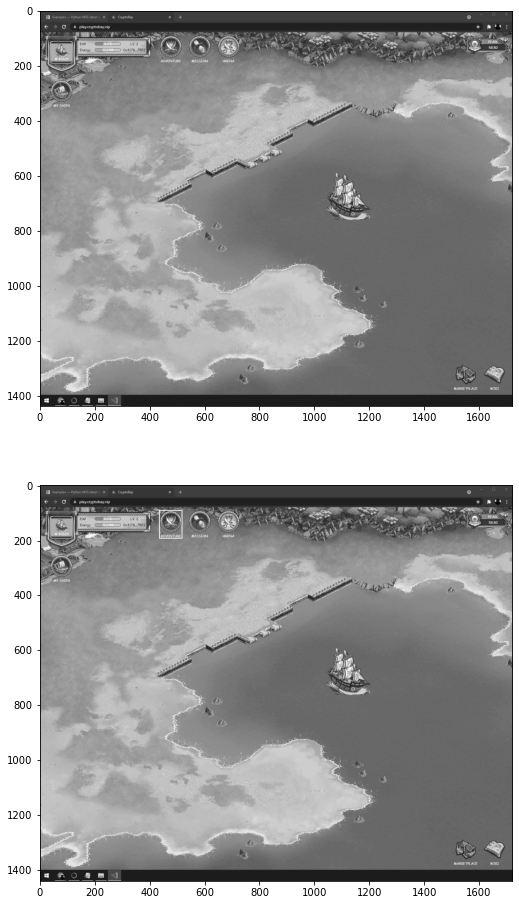

In [44]:
# TEST
template = cv2.imread('image_templates/button_adventure.png', cv2.IMREAD_GRAYSCALE)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
w, h = template.shape[::-1]

ss = main_screen()

plt.figure(figsize=(16,16))
plt.subplot(2, 1, 1)
plt.imshow(ss, cmap="gray")

result_adventure = cv2.matchTemplate(ss,  template, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result_adventure)

top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

cv2.rectangle(ss ,top_left, bottom_right, 255, 2)

## Positioning 

##
plt.subplot(2, 1, 2)
plt.imshow(ss, cmap="gray")

In [45]:
click_button(template, result_adventure)
sleep()
